In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Load the data into a dataframe
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Step1: understand the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
#extract the unique values of all columns of the dataframe
unique_counts = df.nunique()
print(unique_counts)

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64


In [5]:
print(df['Gender'].unique())

['F' 'M']


In [6]:
    print(df['Age'].unique())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [7]:
print(df['Occupation'].unique())

[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


In [8]:
print(df['City_Category'].unique())

['A' 'C' 'B']


In [9]:
print(df['Stay_In_Current_City_Years'].unique())

['2' '4+' '3' '1' '0']


In [10]:
print(df['Marital_Status'].unique())

[0 1]


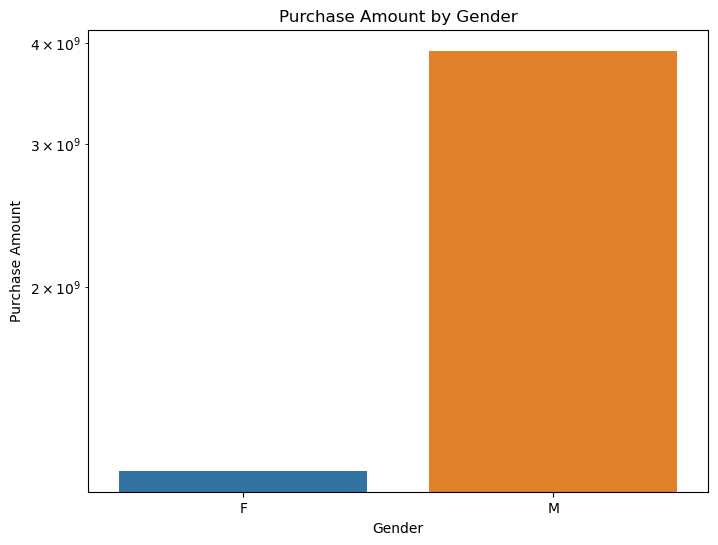

In [11]:
# check the purchase amount according to the gender, marital status

purchase_by_gender = df.groupby('Gender')['Purchase'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Purchase', data=purchase_by_gender)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.yscale('log')
plt.show()

Total Purchase Amount by Gender:
  Gender    Purchase
0      F  1186232642
1      M  3909580100


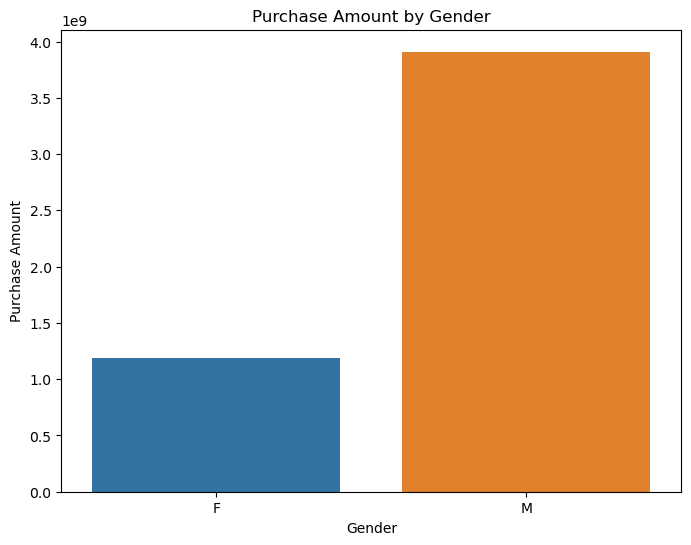

In [13]:
# Assuming df is your DataFrame
purchase_by_gender = df.groupby('Gender')['Purchase'].sum().reset_index()

# Display the total purchase amount by gender
print("Total Purchase Amount by Gender:")
print(purchase_by_gender)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Purchase', data=purchase_by_gender)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()


Total purchase_by_Age:
     Age    Purchase
0   0-17   134913183
1  18-25   913848675
2  26-35  2031770578
3  36-45  1026569884
4  46-50   420843403
5  51-55   367099644
6    55+   200767375


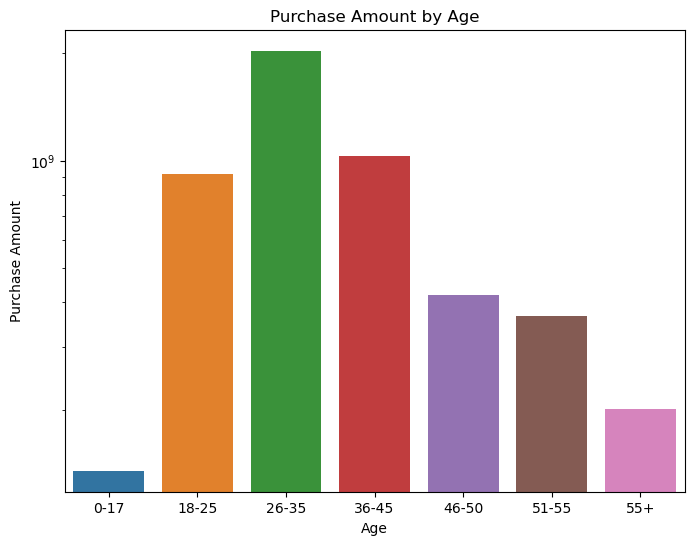

In [14]:
purchase_by_Age = df.groupby('Age')['Purchase'].sum().reset_index()


# Display the total purchase amount by gender
print("Total purchase_by_Age:")
print(purchase_by_Age)

plt.figure(figsize=(8, 6))
sns.barplot(x='Age', y='Purchase', data=purchase_by_Age)
plt.title('Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.yscale('log')
plt.show()

Total purchase_by_Age:
  Stay_In_Current_City_Years    Purchase
0                          0   682979229
1                          1  1792872533
2                          2   949173931
3                          3   884902659
4                         4+   785884390


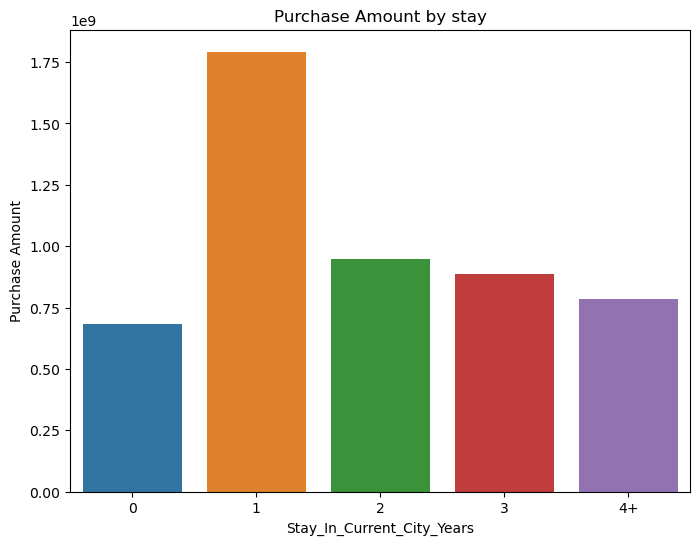

In [15]:
purchase_by_stay = df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().reset_index()

# Display the total purchase amount by gender
print("Total purchase_by_Age:")
print(purchase_by_stay)

plt.figure(figsize=(8, 6))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=purchase_by_stay)
plt.title('Purchase Amount by stay')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Purchase Amount')
plt.show()

Total purchase_by_Age:
    Occupation   Purchase
0            0  635406958
1            1  424614144
2            2  238028583
3            3  162002168
4            4  666244484
5            5  113649759
6            6  188416784
7            7  557371587
8            8   14737388
9            9   54340046
10          10  115844465
11          11  106751618
12          12  305449446
13          13   71919481
14          14  259454692
15          15  118960211
16          16  238346955
17          17  393281453
18          18   60721461
19          19   73700617
20          20  296570442


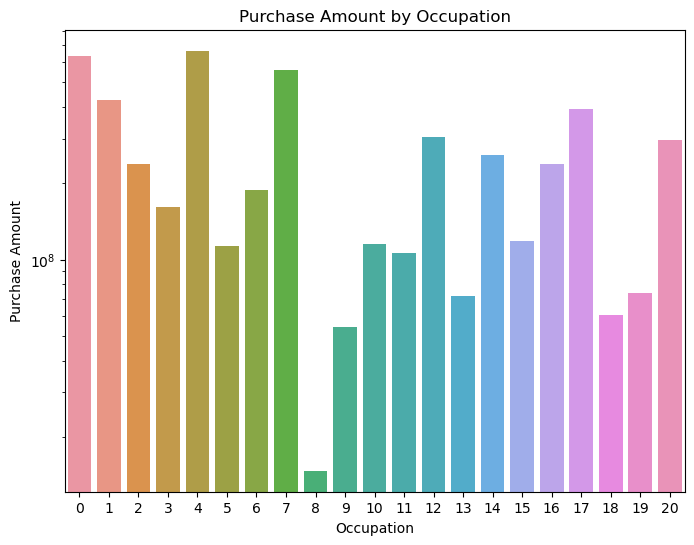

In [16]:
#purchase by Occupation
purchase_by_Occupation = df.groupby('Occupation')['Purchase'].sum().reset_index()

# Display the total purchase amount by gender
print("Total purchase_by_Age:")
print(purchase_by_Occupation)

plt.figure(figsize=(8, 6))
sns.barplot(x='Occupation', y='Purchase', data=purchase_by_Occupation)
plt.title('Purchase Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.yscale('log')
plt.show()

In [95]:
#check the min and maximum purchase amounts in the data
min_Amt = df['Purchase'].min()
max_Amt = df['Purchase'].max()

print("Minimum Purchase Amount:", min_Amt)
print("Maximum Purchase Amount:", max_Amt)


Minimum Purchase Amount: 12
Maximum Purchase Amount: 23961


In [96]:
# Step2: Preprocessing
#1. check for null values in the data
print(df.isnull().any())

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool


In [97]:
#Replace the null values with 0
df[['Product_Category_2','Product_Category_3']] = df[['Product_Category_2','Product_Category_3']].fillna(0)


In [98]:
#Now check if any columns have null values
print(df.isnull().any())

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool


In [99]:
# convert the categorical featues inyo numerical values through encoding


#find the columns with categorical values
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Columns with categorical values:")
print(categorical_columns)

Columns with categorical values:
Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


In [100]:
#get the uniue values of the aove columns
print("Gender:", df['Gender'].unique())
print("Age:", df['Age'].unique())
print("City_Category:", df['City_Category'].unique())
print("Stay_In_Current_City_Years:", df['Stay_In_Current_City_Years'].unique())

Gender: ['F' 'M']
Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category: ['A' 'C' 'B']
Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']


In [101]:
#Binary encoding of the Gender, since it has only two values

df['Gender'] = df['Gender'].replace({'F':0, 'M':1})

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,0,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,0,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,0,55+,1,C,2,0,20,0.0,0.0,365


In [102]:
#encode ordinal features like Age in the order using Dict mapping

age = {'0-17':1, 
         '18-25':2, 
         '26-35':3, 
         '36-45':4, 
         '46-50':5,
         '51-55':6,
         '55+':7}
df['Age'] = df.Age.map(age)


In [103]:
years ={'0':0,
        '1':1,
        '2':2,
        '3':3,
        '4+':4
       }

df['Stay_In_Current_City_Years'] = df.Stay_In_Current_City_Years.map(years)

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,7,16,C,4,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,6,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,0,3,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,0,3,15,B,4,1,20,0.0,0.0,137
550066,1006038,P00375436,0,7,1,C,2,0,20,0.0,0.0,365


In [104]:
City_Category = {'A':1, 
                 'C':2, 
                 'B':3}

df['City_Category'] = df.City_Category.map(City_Category)

In [105]:
#include another column called counts to get the count of categories does the product related to

df['counts'] = df.apply(lambda row: 3 if row['Product_Category_1'] != 0 and row['Product_Category_2'] != 0 and row['Product_Category_3'] != 0
                      else (2 if row['Product_Category_2'] != 0 or row['Product_Category_3'] != 0
                      else 1), axis=1)

In [106]:
# categorize the purchase based on the purchase category
def categorize_purchase(row):
    if row['Product_Category_1'] != 0 and row['Product_Category_2'] == 0 and row['Product_Category_3'] == 0:
        return 1
    elif row['Product_Category_1'] == 0 and row['Product_Category_2'] != 0 and row['Product_Category_3'] == 0:
        return 2
    elif row['Product_Category_1'] == 0 and row['Product_Category_2'] == 0 and row['Product_Category_3'] != 0:
        return 3
    elif row['Product_Category_1'] != 0 and row['Product_Category_2'] != 0 and row['Product_Category_3'] == 0:
        return 4
    elif row['Product_Category_1'] != 0 and row['Product_Category_2'] == 0 and row['Product_Category_3'] != 0:
        return 5
    elif row['Product_Category_1'] == 0 and row['Product_Category_2'] != 0 and row['Product_Category_3'] != 0:
        return 6
    elif row['Product_Category_1'] != 0 and row['Product_Category_2'] != 0 and row['Product_Category_3'] != 0:
        return 7
    else:
        return 8


df['purchase category'] = df.apply(categorize_purchase, axis=1)


In [107]:
df.head(50)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,counts,purchase category
0,1000001,P00069042,0,1,10,1,2,0,3,0.0,0.0,8370,1,1
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200,3,7
2,1000001,P00087842,0,1,10,1,2,0,12,0.0,0.0,1422,1,1
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,0.0,1057,2,4
4,1000002,P00285442,1,7,16,2,4,0,8,0.0,0.0,7969,1,1
5,1000003,P00193542,1,3,15,1,3,0,1,2.0,0.0,15227,2,4
6,1000004,P00184942,1,5,7,3,2,1,1,8.0,17.0,19215,3,7
7,1000004,P00346142,1,5,7,3,2,1,1,15.0,0.0,15854,2,4
8,1000004,P0097242,1,5,7,3,2,1,1,16.0,0.0,15686,2,4
9,1000005,P00274942,1,3,20,1,1,1,8,0.0,0.0,7871,1,1


In [108]:


# Step3: Extract feature set for Regression


X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

In [109]:
#Step4: Traing and Testing

#Split the data into train and test data
from sklearn.model_selection import cross_val_score, train_test_split

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
print("Training set size=",X_train.shape[0], "Testing set size=",X_test.shape[0])

Training set size= 385047 Testing set size= 165021


In [110]:
#Linear Regression


from sklearn.linear_model import LinearRegression

LinearRegression_model =LinearRegression()
LinearRegression_model.fit(X_train,y_train)
y_pred_lin = LinearRegression_model.predict(X_test)

In [111]:
y_pred_lin

array([13041.93260988, 11813.2609601 ,  7580.49964975, ...,
       10009.93383529, 11979.42290496,  8304.06520835])

In [112]:
y_test

84432     19142
72724     15513
197032     7802
353704    15455
91198      4492
          ...  
284287     1840
50876      4050
533433    11836
44339      9548
500108     6888
Name: Purchase, Length: 165021, dtype: int64

In [113]:
#step 5: Linear reg-Calculate performance scores

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

MAE_lin=mean_absolute_error(y_test, y_pred_lin)
MSE_lin=mean_squared_error(y_test, y_pred_lin)
MAPE_lin=mean_absolute_percentage_error(y_test, y_pred_lin)
R2lin_lin = r2_score(y_test, y_pred_lin)
Errlinear_lin = pd.DataFrame((abs(y_test-y_pred_lin)))

print("Linear MAE=",MAE_lin, "Linear MSE=",MSE_lin, "Linear MAPE=", MAPE_lin, 'Linear R2 score=', R2lin_lin)


Linear MAE= 3517.627114990586 Linear MSE= 21329427.808609217 Linear MAPE= 1.1889115309073908 Linear R2 score= 0.1536705458555937


In [114]:
#Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

DTreeRegression_model =DecisionTreeRegressor(random_state=0)
DTreeRegression_model.fit(X_train,y_train)
y_pred_DTree = DTreeRegression_model.predict(X_test)

In [115]:

MAE_DTree=mean_absolute_error(y_test, y_pred_DTree)
MSE_DTree=mean_squared_error(y_test, y_pred_DTree)
MAPE_DTree=mean_absolute_percentage_error(y_test, y_pred_DTree)
R2lin_DTree = r2_score(y_test, y_pred_DTree)
Errlinear_DTree = pd.DataFrame((abs(y_test-y_pred_DTree)))

print("DTree MAE=",MAE_DTree, "DTree MSE=",MSE_DTree, "DTree MAPE=", MAPE_DTree, 'DTree R2 score=', R2lin_DTree)


DTree MAE= 2386.081963521848 DTree MSE= 11432366.636264775 DTree MAPE= 0.3472629831947949 DTree R2 score= 0.5463756129949562


In [116]:
#Random Forest Regression


from sklearn.ensemble import RandomForestRegressor


RFRegression_model = RandomForestRegressor(n_estimators = 10, random_state=0)
RFRegression_model.fit(X_train,y_train)
y_pred_RF = RFRegression_model.predict(X_test)

In [117]:

MAE_RF=mean_absolute_error(y_test, y_pred_RF)
MSE_RF=mean_squared_error(y_test, y_pred_RF)
MAPE_RF=mean_absolute_percentage_error(y_test, y_pred_RF)
R2lin_RF = r2_score(y_test, y_pred_RF)
Errlinear_RF = pd.DataFrame((abs(y_test-y_pred_RF)))

print("RF MAE=",MAE_RF, "RF MSE=",MSE_RF, "RF MAPE=", MAPE_RF, 'RF R2 score=', R2lin_RF)


RF MAE= 2252.16770758375 RF MSE= 9631087.406886028 RF MAPE= 0.33331482758426084 RF R2 score= 0.6178484945293801


In [118]:
#XGBoost

from sklearn.ensemble import GradientBoostingRegressor
xgb_reg = GradientBoostingRegressor(random_state=0)
xgb_reg.fit(X_train,y_train)
y_pred_xgb = xgb_reg.predict(X_test)

In [119]:
MAE_xgb=mean_absolute_error(y_test, y_pred_xgb)
MSE_xgb=mean_squared_error(y_test, y_pred_xgb)
MAPE_xgb=mean_absolute_percentage_error(y_test, y_pred_xgb)
R2lin_xgb = r2_score(y_test, y_pred_xgb)
Errlinear_xgb = pd.DataFrame((abs(y_test-y_pred_xgb)))

print("RF MAE=",MAE_xgb, "RF MSE=",MSE_xgb, "RF MAPE=", MAPE_xgb, 'RF R2 score=', R2lin_xgb)

RF MAE= 2273.3277038880647 RF MSE= 8988511.252605574 RF MAPE= 0.3986470934220537 RF R2 score= 0.6433452462837277


In [120]:
#optimizing the prediction using GridSearch to tune in the hyper parameters of XGBoost Regressor

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Create the XGBoost regressor
xgb = XGBRegressor(random_state=0)


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


final_xgb = XGBRegressor(random_state=0, **best_params)
final_xgb.fit(X_train, y_train)




Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [121]:
y_pred_final_xgb = final_xgb.predict(X_test)

In [122]:
MAE_xgb=mean_absolute_error(y_test, y_pred_final_xgb)
MSE_xgb=mean_squared_error(y_test, y_pred_final_xgb)
MAPE_xgb=mean_absolute_percentage_error(y_test, y_pred_final_xgb)
R2lin_xgb = r2_score(y_test, y_pred_final_xgb)
Errlinear_xgb = pd.DataFrame((abs(y_test-y_pred_final_xgb)))

print("xgb MAE=",MAE_xgb, "xgb MSE=",MSE_xgb, "xgb MAPE=", MAPE_xgb, 'xgb R2 score=', R2lin_xgb)

xgb MAE= 2175.030780015798 xgb MSE= 8440992.193530725 xgb MAPE= 0.352164666552076 xgb R2 score= 0.6650702316212829
